# UN Data Exploration

##### We will begin with import statements and importing data. We need to collect GDP Per Capita, Continents, Life Expectancy, Population, and Homicide Data found at data.un.org.

In [354]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import Data

In [355]:
#import gdp_per_capita data to gdp_df data frame
gdp_df = (
    pd.read_csv('../data/gdp_per_capita.csv', dtype={'Country or Area':'category','Year':'int16'}) #adding more efficient dtypes for data storage
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)

#import continents data to continents data frame, specifying dtype for data efficiency
continents = pd.read_csv('../data/continents.csv', dtype={'Continent':'category'})

#cleaning up life expectancy data frame to fit our other data frames
life_expectancy = (
    pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv', skiprows=4) #first four rows don't have anything we care about
    .drop(columns=['Country Code','Indicator Name','Indicator Code'])
    .melt(id_vars='Country Name') #melting data frame down so years become rows instead of columns
    .rename(columns={'Country Name':'Country','variable':'Year', 'value':'Life_Expectancy'})
    .dropna() #Drop all missing values for Life_Expectancy.
)

#import population data to population data frame
population = (
    pd.read_csv('../data/population.csv', dtype={'Country or Area':'category','Year(s)':'int16'})
    .rename(columns={'Country or Area': 'Country', 'Year(s)':'Year', 'Value':'Population', 'Variant':'Pop_Variant'})
)

#import Homicide_Data to homicide_df data frame
homicide_df = (
    pd.read_excel('../data/Homicide_Data.xls',skiprows=1) #column names start on second row
    .drop(columns=['Source','Region','Subregion'])
)


### Analyzing GDP Per Capita Data Frame

In [356]:
#first ten rows
gdp_df[:10]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [357]:
#last ten rows
gdp_df[-10:]

,Country,Year,GDP_Per_Capita
7652,Zimbabwe,1999,2866.032886
7653,Zimbabwe,1998,2931.725144
7654,Zimbabwe,1997,2896.147308
7655,Zimbabwe,1996,2867.026043
7656,Zimbabwe,1995,2641.378271
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843
7661,Zimbabwe,1990,2704.757299


In [358]:
gdp_df_shape = gdp_df.shape
print(f'Looking at the shape of gdp_df, we see that gdp_df has {gdp_df_shape[0]} rows and {gdp_df_shape[1]} columns.')
gdp_df.dtypes

Looking at the shape of gdp_df, we see that gdp_df has 7662 rows and 3 columns.


Country           category
Year                 int16
GDP_Per_Capita     float64
dtype: object

In [359]:
gdp_df['Year'].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

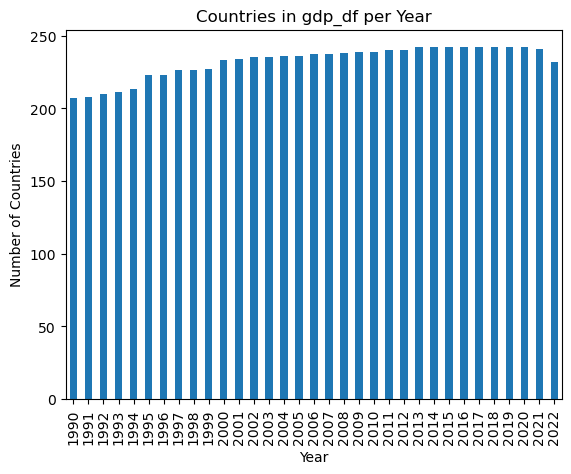

In [360]:
#I wonder if this is correlated with the number of countries in the world?
year_value_counts = gdp_df['Year'].value_counts().sort_index()
year_value_counts.plot(kind='bar')
plt.ylabel('Number of Countries')
plt.title('Countries in gdp_df per Year')
plt.show()

In [361]:
gdp_df['Country'].unique()
#May need to come back and clean this up...?

['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ..., 'Viet Nam', 'West Bank and Gaza', 'World', 'Zambia', 'Zimbabwe']
Length: 242
Categories (242, object): ['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', ..., 'West Bank and Gaza', 'World', 'Zambia', 'Zimbabwe']

### Analyzing GDP Per Capita for 1990 and 2021

In [362]:
#creating new dataframe by subsetting gdp_df
gdp_2021 = gdp_df[gdp_df['Year']==2021]
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


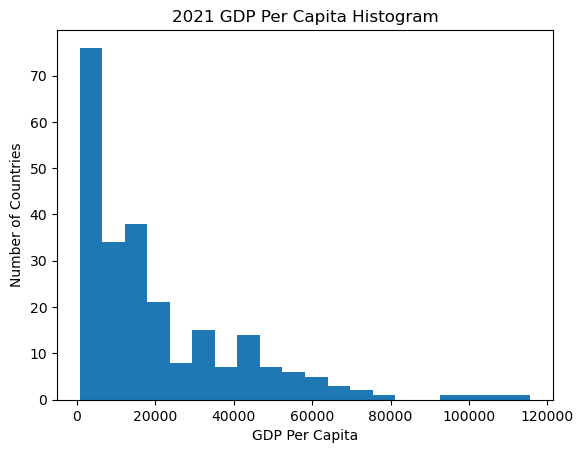

In [363]:
plt.hist(gdp_2021['GDP_Per_Capita'], bins=20)
plt.title('2021 GDP Per Capita Histogram')
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')
plt.show()

I would descibe this as a very right-skewed distribution! The majority of countries have a GDP per Capita less than 20,000 USD, but there are a handful of countries with a GDP Per Capita greater than 80,000 USD.

In [364]:
#top five and bottom five countries sorted by GDP Per Capita
gdp_2021.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809
...,...,...,...
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436


Now back to the full gdp_df, just going to look at years 1990 and 2021. This has flexibility to look at any two years in the data.

In [365]:
first_year = 1990 #first year we want to look at
final_year = 2021 #final year we want to look at
gdp_pivoted = (
    gdp_df[gdp_df['Year'].isin([first_year,final_year])]
    .pivot_table(index='Country', columns='Year', values='GDP_Per_Capita', observed=False)
    .dropna()
)
gdp_pivoted

Year,1990,2021
Country,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429


Add percent change column to compare 1990 and 2021 GDP Per Capita

In [366]:
gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[final_year]-gdp_pivoted[first_year])/(gdp_pivoted[first_year]))
gdp_pivoted

Year,1990,2021,Percent_Change
Country,,,
Africa Eastern and Southern,3037.297466,3519.174840,15.865334
Africa Western and Central,2788.301039,4014.607965,43.980435
Albania,4827.027705,14595.944386,202.379544
Algeria,8828.874473,11029.138782,24.921232
Angola,5793.084512,5911.835657,2.049878
...,...,...,...
Vanuatu,2774.138350,2800.493866,0.950043
Viet Nam,2099.394649,10628.219166,406.251608
World,9705.981267,17055.357429,75.720074


How many countries experienced a negative percent change from 1990 to 2021?

In [367]:
gdp_pivoted_neg_change = gdp_pivoted[gdp_pivoted['Percent_Change']<0]
num_countries_gdp_neg_change = gdp_pivoted_neg_change['Percent_Change'].count()
print(f'{num_countries_gdp_neg_change} countries experienced a negative percent change in GDP Per Capita from {first_year} to {final_year}.')

19 countries experienced a negative percent change in GDP Per Capita from 1990 to 2021.


Finding the top two countries with increase in GDP Per Cap from 1990 to 2021

In [368]:
gdp_pivoted_pos_change=gdp_pivoted[gdp_pivoted['Percent_Change']>=0]
gdp_pivoted_pos_change = gdp_pivoted_pos_change.sort_values(by='Percent_Change', ascending=False)
gdp_pivoted_pos_change.iloc[:2]

Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,936.419751,14637.007350,1463.081870
China,1423.896348,17657.495181,1140.082904


The two countries with the highest percentage change in GDP Per Capita from 1990 to 2021 are Equatorial Guinea and China.


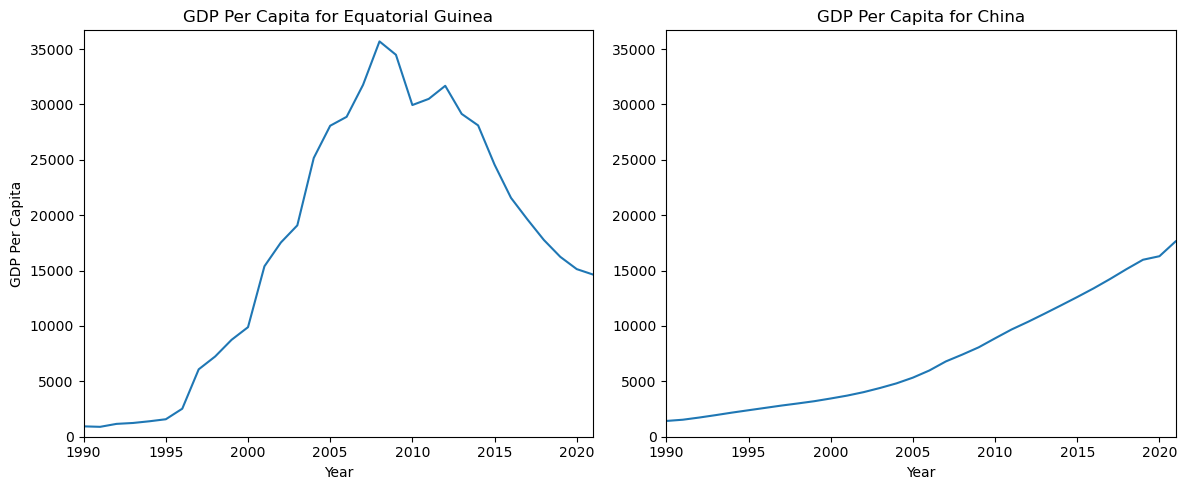

In [369]:
highest_percent_change_country=gdp_pivoted_pos_change.index[0]
second_highest_percent_change_country=gdp_pivoted_pos_change.index[1]
highest_pct_df = gdp_df[gdp_df['Country']==highest_percent_change_country]
second_highest_pct_df = gdp_df[gdp_df['Country']==second_highest_percent_change_country]
print(f'The two countries with the highest percentage change in GDP Per Capita from {first_year} to {final_year} are {highest_percent_change_country} and {second_highest_percent_change_country}.')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
y_min = 0
y_max = max(highest_pct_df['GDP_Per_Capita'].max(), second_highest_pct_df['GDP_Per_Capita'].max()) + 1000

axes[0].plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'])
axes[0].set_title(f'GDP Per Capita for {highest_percent_change_country}')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Per Capita')
axes[0].set_ylim(y_min, y_max)
axes[0].set_xlim(first_year, final_year)

axes[1].plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'])
axes[1].set_title('GDP Per Capita for ' + second_highest_percent_change_country)
axes[1].set_xlabel('Year')
#axes[1].set_ylabel('GDP Per Capita')
axes[1].set_ylim(y_min, y_max)
axes[1].set_xlim(first_year, final_year)
plt.tight_layout()
plt.show()

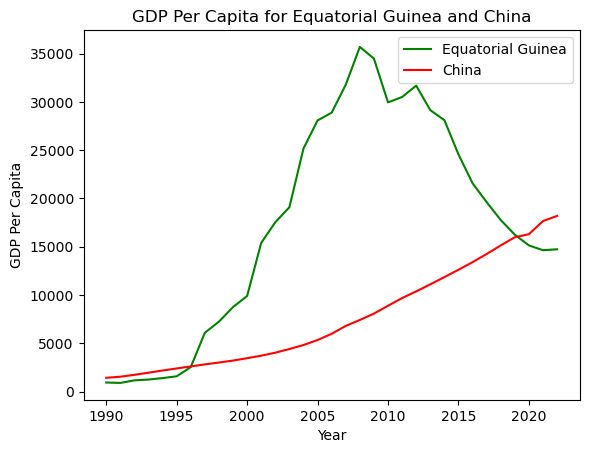

In [370]:
plt.plot(highest_pct_df['Year'], highest_pct_df['GDP_Per_Capita'], color='Green', label=highest_percent_change_country)
plt.plot(second_highest_pct_df['Year'], second_highest_pct_df['GDP_Per_Capita'], color='Red', label=second_highest_percent_change_country)
plt.title('GDP Per Capita for ' + highest_percent_change_country + ' and ' + second_highest_percent_change_country)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend()
plt.show()

## GDP Per Capita Across Continents

In [371]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


Merging continents data frame with gdp_df

In [372]:
gdp_df = pd.merge(gdp_df, continents, on='Country', validate='many_to_one')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


Continent
Africa           50
Asia             41
Europe           44
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64


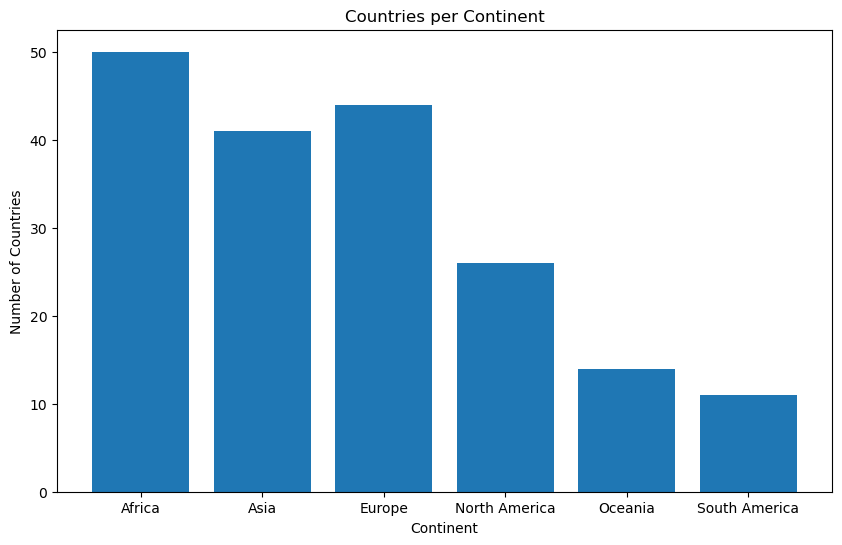

In [373]:
unique_continent_counts = gdp_df.groupby(gdp_df['Continent'], observed=False)['Country'].nunique()
print(unique_continent_counts)
#unique_continent_counts.plot(kind='bar') is also an option
plt.figure(figsize=(10,6))
plt.bar(unique_continent_counts.index, unique_continent_counts.values)
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Countries per Continent')
plt.show()

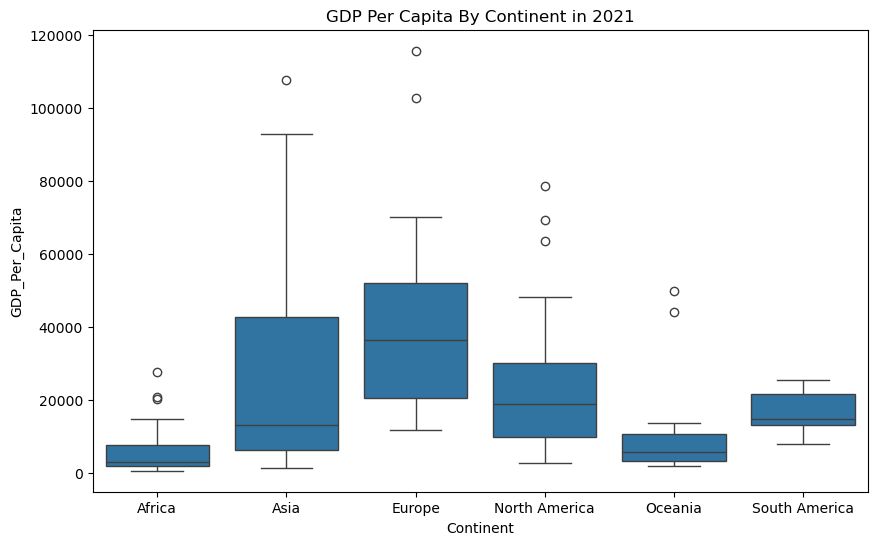

In [374]:
plt.figure(figsize=(10,6))
sns.boxplot(data=gdp_df[gdp_df['Year']==2021], 
            x='Continent', 
            y='GDP_Per_Capita')
plt.title('GDP Per Capita By Continent in 2021')
plt.show()

## Life Expectancy Data

In [375]:
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
16753,Kosovo,2022,79.524000
16754,"Yemen, Rep.",2022,63.720000
16755,South Africa,2022,61.480000
16756,Zambia,2022,61.803000


First country with life expectancy > 80?

In [376]:
life_exp_val = 80
ovr_life_exp_val = life_expectancy[life_expectancy['Life_Expectancy']>life_exp_val].sort_values('Year')
print(ovr_life_exp_val['Country'].iloc[0] + ' was the first country to exceed a life expectancy of '+ str(life_exp_val) + ' in ' + ovr_life_exp_val['Year'].iloc[0] + '!')

Japan was the first country to exceed a life expectancy of 80 in 1996!


Merging gdp_df and life_expectancy data frames

In [377]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int) #convert year object to int
gdp_le = (
    pd.merge(gdp_df, life_expectancy, on=['Country', 'Year'])
    .sort_values(['Country','Year'])
)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
19,Afghanistan,2002,1280.463171,Asia,56.454
18,Afghanistan,2003,1292.333437,Asia,57.344
17,Afghanistan,2004,1260.060581,Asia,57.944
16,Afghanistan,2005,1352.320627,Asia,58.361
15,Afghanistan,2006,1366.993146,Asia,58.684
...,...,...,...,...,...
5475,Zimbabwe,2018,2399.621551,Africa,61.414
5474,Zimbabwe,2019,2203.396810,Africa,61.292
5473,Zimbabwe,2020,1990.319419,Africa,61.124
5472,Zimbabwe,2021,2115.144555,Africa,59.253


Just looking at 2021, how many countries have a life expectany greater than 80?

In [378]:
gdp_le_2021=gdp_le[gdp_le['Year']==2021]
gdp_le_2021_grth80 = gdp_le_2021[gdp_le_2021['Life_Expectancy']>80]
#print(gdp_le_2021_grth80.describe())
print(f'{gdp_le_2021_grth80.count().iloc[0] } countries have a life expectancy greater than 80 in 2021.')

31 countries have a life expectancy greater than 80 in 2021.


Finding the top three highest GDP Per Capita countries in 2021

In [379]:
gdp_le_2021=gdp_le_2021.sort_values('GDP_Per_Capita', ascending=False)
print(gdp_le_2021[:3])
fir_highest_GDP_2021=gdp_le_2021['Country'].iloc[0]
sec_highest_GDP_2021=gdp_le_2021['Country'].iloc[1]
thd_highest_GDP_2021=gdp_le_2021['Country'].iloc[2]
top_three_highest_gdp_2021_countries = [fir_highest_GDP_2021, sec_highest_GDP_2021, thd_highest_GDP_2021]

         Country  Year  GDP_Per_Capita Continent  Life_Expectancy
2857  Luxembourg  2021   115683.493708    Europe        82.597561
4364   Singapore  2021   107741.118436      Asia        83.092683
2285     Ireland  2021   102785.490239    Europe        82.353659


In [380]:
top_three_2021 = gdp_le[gdp_le['Country'].isin(top_three_highest_gdp_2021_countries)]
print(top_three_2021)

        Country  Year  GDP_Per_Capita Continent  Life_Expectancy
2316    Ireland  1990    26781.627609    Europe        74.846073
2315    Ireland  1991    27141.920541    Europe        75.025000
2314    Ireland  1992    27858.632081    Europe        75.415098
2313    Ireland  1993    28466.114894    Europe        75.292195
2312    Ireland  1994    29986.140304    Europe        75.787122
...         ...   ...             ...       ...              ...
4367  Singapore  2018    98280.042373      Asia        83.297561
4366  Singapore  2019    98455.328233      Asia        83.595122
4365  Singapore  2020    94910.101431      Asia        83.543902
4364  Singapore  2021   107741.118436      Asia        83.092683
4363  Singapore  2022   108036.110993      Asia        82.895122

[99 rows x 5 columns]


Graphs for the Three Highest GDP Per Capita Countries in 2021

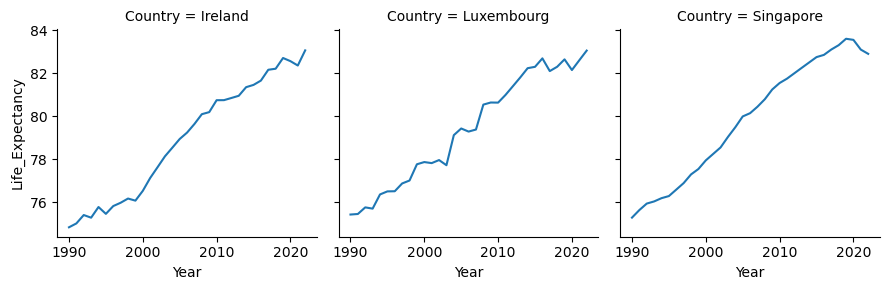

In [381]:
top_three_2021_graph = sns.FacetGrid(top_three_2021, col='Country')
top_three_2021_graph.map(sns.lineplot, "Year", 'Life_Expectancy');

Scatterplot of Life Expectancy vs. GDP Per Capita for 2021

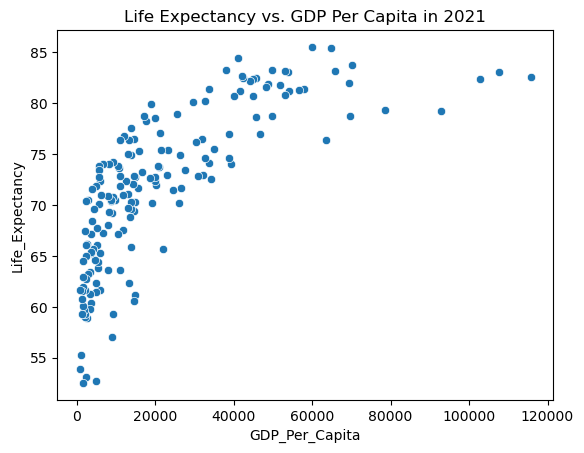

In [382]:
sns.scatterplot(data=gdp_le_2021, x='GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. GDP Per Capita in 2021');

I notice that there is a positive correlation between GDP Per Capita and life expectancy. It is not necessarily linear, but definitely correlated. 

In [383]:
corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])
print('2021 GDP per capita and life expectancy correlation = ' + str(corr_le_gdp_2021))

2021 GDP per capita and life expectancy correlation = 0.7450812403297987


Now looking at a log scale

2021 GDP per capita (log scale) and life expectancy correlation = 0.8465749797261867


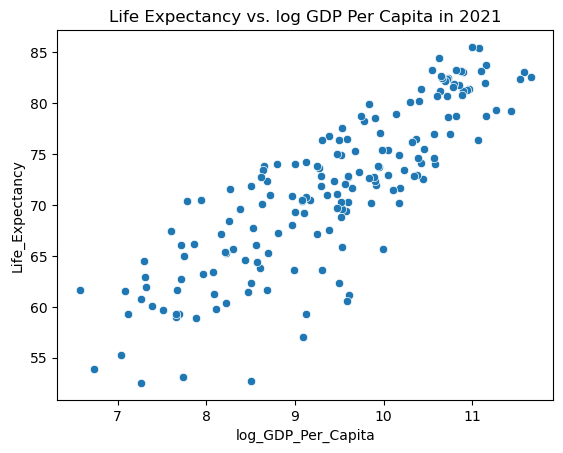

In [384]:
#log scale
gdp_le_2021['log_GDP_Per_Capita'] = gdp_le_2021['GDP_Per_Capita'].apply(np.log)
log_corr_le_gdp_2021 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['log_GDP_Per_Capita'])
print('2021 GDP per capita (log scale) and life expectancy correlation = ' + str(log_corr_le_gdp_2021))
sns.scatterplot(data=gdp_le_2021, x='log_GDP_Per_Capita', y='Life_Expectancy')
plt.title('Life Expectancy vs. log GDP Per Capita in 2021');

## Bonus Questions

In [385]:
gdp_le_grouped_by_year_and_continent = gdp_le.groupby(['Year','Continent'], observed=True)
gdp_le_grouped_by_year_and_continent_median = gdp_le_grouped_by_year_and_continent['Life_Expectancy'].agg('median')
#print(gdp_le_grouped_by_year_and_continent_median)
print(f'gdp_le_grouped_by_year_and_continent is a {type(gdp_le_grouped_by_year_and_continent_median)}') #it's a series!

gdp_le_grouped_by_year_and_continent is a <class 'pandas.core.series.Series'>


In [386]:
print(gdp_le_grouped_by_year_and_continent_median.index)

MultiIndex([(1990,        'Africa'),
            (1990,          'Asia'),
            (1990,        'Europe'),
            (1990, 'North America'),
            (1990,       'Oceania'),
            (1990, 'South America'),
            (1991,        'Africa'),
            (1991,          'Asia'),
            (1991,        'Europe'),
            (1991, 'North America'),
            ...
            (2021,        'Europe'),
            (2021, 'North America'),
            (2021,       'Oceania'),
            (2021, 'South America'),
            (2022,        'Africa'),
            (2022,          'Asia'),
            (2022,        'Europe'),
            (2022, 'North America'),
            (2022,       'Oceania'),
            (2022, 'South America')],
           names=['Year', 'Continent'], length=198)


The index for gdp_le_grouped_by_year_and_continent_median looks like a tuple

In [387]:
print(f'The median life expectancy for all of Asia in 2010 was {gdp_le_grouped_by_year_and_continent_median.loc[2010, 'Asia']}')

The median life expectancy for all of Asia in 2010 was 71.879


What is the median life expectancy for Asia and Africa in 2010?

In [388]:
gdp_le_grouped_by_year_and_continent_median.loc[2010, ['Asia','Africa']]

Year  Continent
2010  Asia         71.879
      Africa       58.365
Name: Life_Expectancy, dtype: float64

What is the median life epxpectancy for each continent in 2010?

In [389]:
gdp_le_grouped_by_year_and_continent_median.loc[2010]

Continent
Africa           58.365000
Asia             71.879000
Europe           78.481415
North America    74.190000
Oceania          68.030000
South America    73.711000
Name: Life_Expectancy, dtype: float64

Showing the median life expectancy for Asia by every year

In [390]:
gdp_le_grouped_by_year_and_continent_median.loc[:, 'Asia']

Year
1990    66.957000
1991    67.884500
1992    68.102439
1993    67.367341
1994    67.942000
1995    68.223000
1996    68.702000
1997    69.225000
1998    69.572000
1999    70.088000
2000    70.355000
2001    69.887000
2002    70.375000
2003    70.488500
2004    69.095329
2005    71.153500
2006    71.098500
2007    71.266000
2008    71.146500
2009    69.910000
2010    71.879000
2011    72.015500
2012    72.173500
2013    72.432000
2014    72.031000
2015    73.188000
2016    73.482000
2017    73.891500
2018    73.971500
2019    74.210500
2020    73.272000
2021    72.541000
2022    74.075000
Name: Life_Expectancy, dtype: float64

Analyzing the minimum, medium, and maximum GDP Per Capita and Life Expectancy for each continent by year

In [391]:
gdp_le_grouped_stats = gdp_le_grouped_by_year_and_continent[['GDP_Per_Capita','Life_Expectancy']].agg(['min','median','max'])
gdp_le_grouped_stats

GDP_Per_Capita                               \
                              min        median            max   
Year Continent                                                   
1990 Africa            460.123697   2199.799280   17559.006114   
     Asia              581.613311   5507.061391  105893.626059   
     Europe           4827.027705  26781.627609   70860.819124   
     North America    3409.794251   9788.684598   65961.406278   
     Oceania          2045.272278   3426.440476   31006.100227   
...                           ...           ...            ...   
2022 Asia             4001.699955  12304.948125  108036.110993   
     Europe          10731.440430  37312.101564  115541.774828   
     North America    2799.112561  15106.775175   81165.650944   
     Oceania          2002.718218   5116.335518   50997.546433   
     South America    8201.183799  15093.465117   34420.067505   

                   Life_Expectancy                        
                               min     median        max  
Year Continent                                            
1990 Africa              41.852000  52.496500  70.110000  
     Asia                53.713000  66.957000  78.837073  
     Europe              62.352000  74.846073  77.536829  
     North America       52.975000  70.713500  77.436585  
     Oceania             59.721000  65.508000  76.994634  
...                            ...        ...        ...  
2022 Asia                66.431000  74.075000  85.377000  
     Europe              68.587927  80.080293  83.453659  
     North America       63.728000  74.615000  81.571000  
     Oceania             64.014000  68.312000  83.200000  
     South America       64.928000  73.425000  79.519000  

[198 rows x 6 columns]

In [392]:
print(f'The median GDP Per Capita for Asia in 2010 is{gdp_le_grouped_stats.loc[(2010, 'Asia'),('GDP_Per_Capita','median')]: .2f}')

The median GDP Per Capita for Asia in 2010 is 8602.90


Finding the median GDP Per Capita for each continent across all years

In [393]:
gdp_median_per_year = gdp_le_grouped_stats.loc[:,('GDP_Per_Capita','median')]
print(gdp_median_per_year)

Year  Continent    
1990  Africa            2199.799280
      Asia              5507.061391
      Europe           26781.627609
      North America     9788.684598
      Oceania           3426.440476
                           ...     
2022  Asia             12304.948125
      Europe           37312.101564
      North America    15106.775175
      Oceania           5116.335518
      South America    15093.465117
Name: (GDP_Per_Capita, median), Length: 198, dtype: float64


#### Now I want to evaluate the change in median GDP Per Capita per year by continent.

In [394]:
gdp_median_per_year = gdp_median_per_year.reset_index('Continent')
print(gdp_median_per_year.head(10))

          Continent GDP_Per_Capita
                            median
Year                              
1990         Africa    2199.799280
1990           Asia    5507.061391
1990         Europe   26781.627609
1990  North America    9788.684598
1990        Oceania    3426.440476
1990  South America    8818.629371
1991         Africa    2182.617129
1991           Asia    4707.072490
1991         Europe   25955.788396
1991  North America    9887.835044


Data Frame with column for median yearly change in GDP Per Capita per continent

In [395]:
gdp_median_per_year['Previous_Year']=gdp_median_per_year[('GDP_Per_Capita','median')].shift(periods=6)
gdp_median_per_year['Change_in_GDP_Per_Capita']=gdp_median_per_year[('GDP_Per_Capita','median')]-gdp_median_per_year['Previous_Year']
print(gdp_median_per_year.head(10))

          Continent GDP_Per_Capita Previous_Year Change_in_GDP_Per_Capita
                            median                                       
Year                                                                     
1990         Africa    2199.799280           NaN                      NaN
1990           Asia    5507.061391           NaN                      NaN
1990         Europe   26781.627609           NaN                      NaN
1990  North America    9788.684598           NaN                      NaN
1990        Oceania    3426.440476           NaN                      NaN
1990  South America    8818.629371           NaN                      NaN
1991         Africa    2182.617129   2199.799280               -17.182152
1991           Asia    4707.072490   5507.061391              -799.988901
1991         Europe   25955.788396  26781.627609              -825.839214
1991  North America    9887.835044   9788.684598                99.150446


How many times did the median GDP Per Capita drop from one year to the next?

In [396]:
gdp_median_per_year_neg = gdp_median_per_year[gdp_median_per_year['Change_in_GDP_Per_Capita']<0]
print(f'The median GDP Per Capita dropped {gdp_median_per_year_neg.size} times.')

The median GDP Per Capita dropped 188 times.


What is the yearly change in GDP Per Capita for each country? 

In [397]:
gdp_le_grouped_by_year = gdp_le.copy() #creating a copy of gdp_le
gdp_le_grouped_by_year['Change_in_GDP_Per_Capita'] = gdp_le_grouped_by_year['GDP_Per_Capita'] - gdp_le_grouped_by_year.groupby('Country')['GDP_Per_Capita'].shift(periods=1)
print(gdp_le_grouped_by_year.iloc[15:25]) #showing that calculations didn't carry over from one country to the next

        Country  Year  GDP_Per_Capita Continent  Life_Expectancy  \
4   Afghanistan  2017     2096.093111      Asia           63.016   
3   Afghanistan  2018     2060.698973      Asia           63.081   
2   Afghanistan  2019     2079.921861      Asia           63.565   
1   Afghanistan  2020     1968.341002      Asia           62.575   
0   Afghanistan  2021     1517.016266      Asia           61.982   
52      Albania  1990     4827.027705    Europe           73.144   
51      Albania  1991     3496.369626    Europe           73.378   
50      Albania  1992     3264.820757    Europe           73.715   
49      Albania  1993     3598.810267    Europe           73.939   
48      Albania  1994     3921.614970    Europe           74.131   

    Change_in_GDP_Per_Capita  
4                  -5.329076  
3                 -35.394138  
2                  19.222888  
1                -111.580859  
0                -451.324735  
52                       NaN  
51              -1330.658079  
50 

What countries have the greatest one year increase and decrease in GDP Per Capita?

In [398]:
country_sorted_by_one_year_gdp_increase = (
    gdp_le_grouped_by_year
    .sort_values('Change_in_GDP_Per_Capita', ascending=False)
    .dropna()
)
greatest_gdp_increase = country_sorted_by_one_year_gdp_increase['Country'].iloc[0]
greatest_gdp_drop = country_sorted_by_one_year_gdp_increase['Country'].iloc[-1]
print('The country with greatest GDP Per Capita increase is ' + greatest_gdp_increase)
print('The country with greatest GDP Per Capita drop is ' + greatest_gdp_drop)

The country with greatest GDP Per Capita increase is Macao SAR, China
The country with greatest GDP Per Capita drop is Macao SAR, China


Comparing 3 year rolling average GDP Per Capita for the US with actual GDP Per Capita

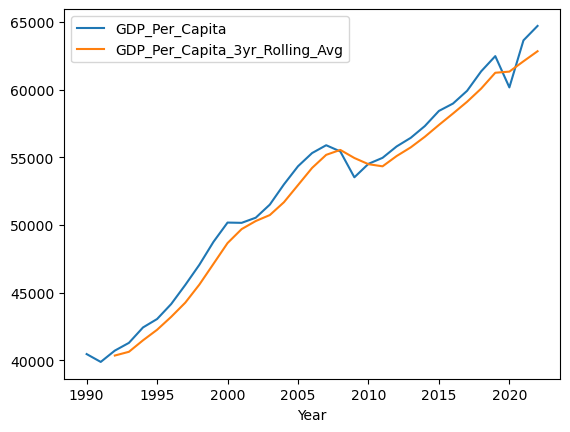

In [399]:
gdp_le_us = gdp_le[gdp_le['Country']=='United States'].copy()
gdp_le_us['GDP_Per_Capita_3yr_Rolling_Avg'] = gdp_le_us['GDP_Per_Capita'].rolling(3).mean()
gdp_le_us.plot(x='Year', y=['GDP_Per_Capita','GDP_Per_Capita_3yr_Rolling_Avg'], kind='line')
plt.show()

### Looking at Memory Usage

In [400]:
gdp_le['Continent_Category'] = gdp_le['Continent'].astype('category')
gdp_le['Year_int16'] = gdp_le['Year'].astype('int16')
#The above code is just demonstrative since I went back and already changed 
# the type of Continent and Year when the data was read in.
gdp_le.memory_usage()

Index                 44032
Country               44032
Year                  11008
GDP_Per_Capita        44032
Continent              5724
Life_Expectancy       44032
Continent_Category     5724
Year_int16            11008
dtype: int64

In [401]:
%%timeit magic

gdp_le.groupby('Continent')['GDP_Per_Capita'].agg('median')

<magic-timeit>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



266 μs ± 25.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [402]:
%%timeit magic

gdp_le.groupby('Continent_Category')['GDP_Per_Capita'].agg('median')

<magic-timeit>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



255 μs ± 10.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

## Experimental: Exploring plotly

In [403]:
gdp_le_pop = pd.merge(gdp_le, population, on=['Country','Year'], how='outer')
gdp_le_pop_med = gdp_le_pop[gdp_le_pop['Pop_Variant']=='Medium']
gdp_le_pop_med = gdp_le_pop_med.sort_values('Year')
fig = px.scatter(gdp_le_pop_med.query("Year==2021"), x="GDP_Per_Capita", y="Life_Expectancy", size="Population", color="Continent",
           hover_name="Country", log_x=True, size_max=50)
fig.show()


In [404]:
fig2 = px.scatter(gdp_le_pop_med, x="GDP_Per_Capita", y="Life_Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Continent", hover_name="Country", facet_col="Continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90], width = 600, height=400)
fig2.show()
#Not entirely sure how to get the spacing right. I tried facet_row_spacing.

## Exploring Homicide Data

Manipulating homicide data so that we can merge it with our gdp_le data frame.

In [405]:
homicide_df_melted_number = (
    pd.melt(homicide_df, id_vars='Country', 
            value_vars=[Year for Year in range(2000,2022)], 
            var_name='Year', value_name='Number_of_Victims')
    .dropna()
)
homicide_df_melted_rate = (
    pd.melt(homicide_df, id_vars='Country', 
            value_vars=[f'{Year}.1' for Year in range(2000,2022)], #Doing some data manipulation here.
            var_name='Year', value_name='Homicide_Rate_Per_100k')
    .dropna()
)
homicide_df_melted_rate['Year'] = homicide_df_melted_rate['Year'].str.replace('.1','', regex=False).astype(int)
homicide_df = pd.merge(homicide_df_melted_number, homicide_df_melted_rate, on=['Country','Year'], how='outer')
gdp_le_hom = pd.merge(homicide_df, gdp_le, on=['Country','Year'])
print(gdp_le_hom.sample(10))

                     Country  Year  Number_of_Victims  Homicide_Rate_Per_100k  \
1044                 Iceland  2010               17.0               12.784275   
373   Bosnia and Herzegovina  2017              269.0                9.668580   
1340              Luxembourg  2002                6.0                1.345555   
1192                   Japan  2016             1483.0                4.465115   
2379              Uzbekistan  2004              962.0                3.666868   
1476                  Mexico  2016           196418.0              490.486721   
481                   Canada  2005             2985.0               20.536099   
450               Cabo Verde  2020               36.0                6.178772   
1641             New Zealand  2013              285.0               24.737772   
2340                 Ukraine  2020             1698.0                3.867030   

      GDP_Per_Capita      Continent  Life_Expectancy Continent_Category  \
1044    47457.622919         Euro

Correlation between GDP Per Capita and the Homicide Rate is -0.2886125647097514


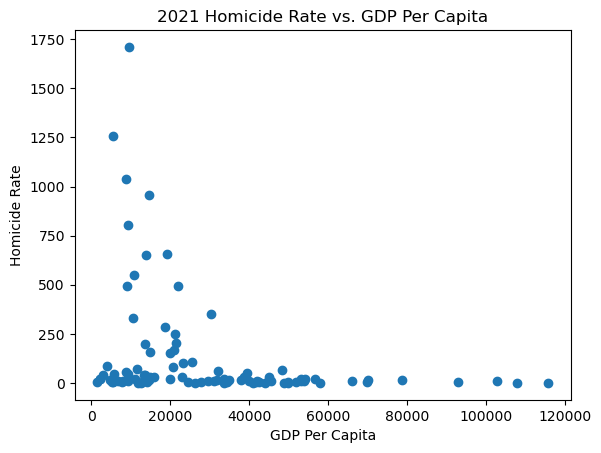

In [407]:
gdp_le_hom_2021 = gdp_le_hom[gdp_le_hom['Year']==2021]
gdp_hom_rate_2021_corr = gdp_le_hom_2021['GDP_Per_Capita'].corr(gdp_le_hom_2021['Homicide_Rate_Per_100k'])
print(f'Correlation between GDP Per Capita and the Homicide Rate is {gdp_hom_rate_2021_corr}')
plt.scatter(gdp_le_hom_2021['GDP_Per_Capita'], gdp_le_hom_2021['Homicide_Rate_Per_100k'])
plt.title('2021 Homicide Rate vs. GDP Per Capita')
plt.ylabel('Homicide Rate')
plt.xlabel('GDP Per Capita')
plt.show()

Looking at homicide data by continent

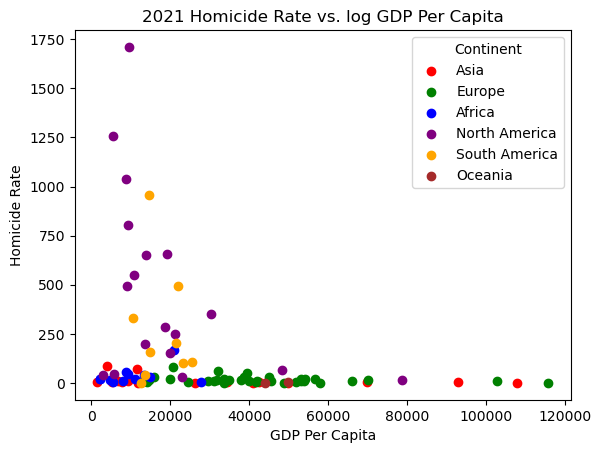

In [436]:
continent_colors = {
    "Asia": "red",
    "Europe": "green",
    "Africa": "blue",
    "North America": "purple",
    "South America": "orange",
    "Oceania": "brown",
}

for continent, color in continent_colors.items():
    continent_data = gdp_le_hom_2021[gdp_le_hom_2021['Continent'] == continent]
    plt.scatter(continent_data['GDP_Per_Capita'], 
                continent_data['Homicide_Rate_Per_100k'], 
                c=color, label=continent)

plt.title('2021 Homicide Rate vs. log GDP Per Capita')
plt.ylabel('Homicide Rate')
plt.xlabel('GDP Per Capita')
plt.legend(title="Continent")
plt.show()


The correlation between log GDP Per Capita and Homicide Rate is -0.25725575792338295


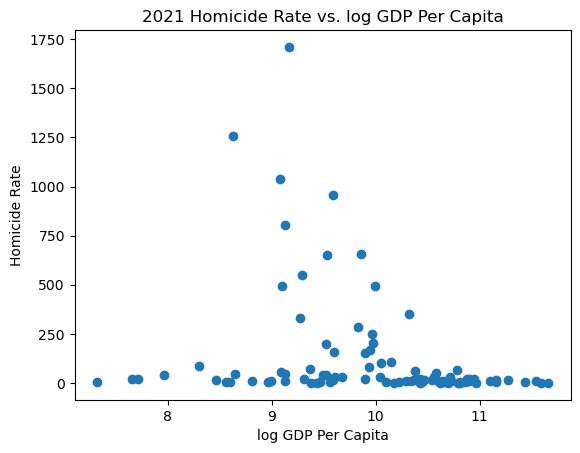

In [429]:
#log scale
gdp_le_hom['log_GDP_Per_Capita']=gdp_le_hom['GDP_Per_Capita'].apply(np.log)
gdp_le_hom_2021 = gdp_le_hom[gdp_le_hom['Year']==2021]
log_gdp_hom_rate_2021_corr = gdp_le_hom_2021['log_GDP_Per_Capita'].corr(gdp_le_hom_2021['Homicide_Rate_Per_100k'])
print(f'The correlation between log GDP Per Capita and Homicide Rate is {log_gdp_hom_rate_2021_corr}')
plt.scatter(gdp_le_hom_2021['log_GDP_Per_Capita'], gdp_le_hom_2021['Homicide_Rate_Per_100k'])
plt.title('2021 Homicide Rate vs. log GDP Per Capita')
plt.ylabel('Homicide Rate')
plt.xlabel('log GDP Per Capita')
plt.show()

This is an intriguing graph! I wonder what the deal is with the group of countries with larger than average Homicide Rates in the middle of the log scale.

-0.17496485176205248


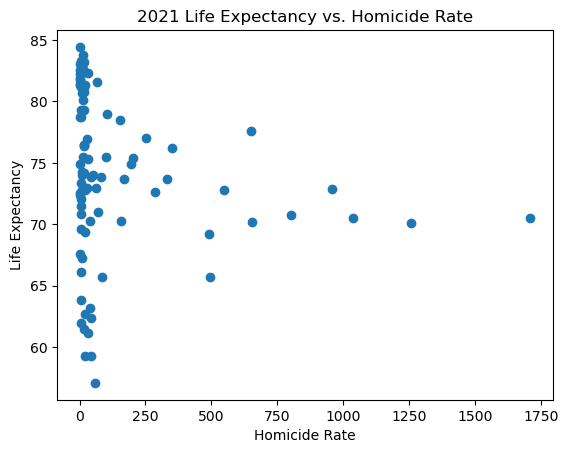

In [58]:
le_hom_corr_2021 = gdp_le_hom_2021['Life_Expectancy'].corr(gdp_le_hom_2021['Homicide_Rate_Per_100k'])
print(le_hom_corr_2021)
plt.scatter(gdp_le_hom_2021['Homicide_Rate_Per_100k'], gdp_le_hom_2021['Life_Expectancy'])
plt.title('2021 Life Expectancy vs. Homicide Rate')
plt.ylabel('Life Expectancy')
plt.xlabel('Homicide Rate')
plt.show()

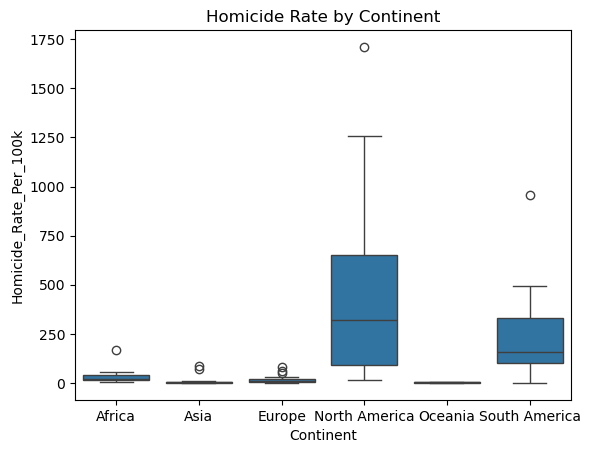

In [413]:
sns.boxplot(data=gdp_le_hom_2021, x='Continent', y='Homicide_Rate_Per_100k')
plt.title('Homicide Rate by Continent');

In [425]:
gdp_le_hom_2021.nlargest(10, columns=['Homicide_Rate_Per_100k'])
#I am curious why most of these are in North America.

,Country,Year,Number_of_Victims,Homicide_Rate_Per_100k,GDP_Per_Capita,Continent,Life_Expectancy,Continent_Category,Year_int16,log_GDP_Per_Capita
1175,Jamaica,2021,13966.0,1711.180819,9607.227254,North America,70.500,North America,2021,9.170271
1012,Honduras,2021,36569.0,1259.430820,5572.176988,North America,70.123,North America,2021,8.625541
316,Belize,2021,1173.0,1036.343838,8762.240537,North America,70.470,North America,2021,9.078207
557,Colombia,2021,138628.0,956.772714,14661.213244,South America,72.830,South America,2021,9.592961
726,El Salvador,2021,11272.0,802.382886,9191.604049,North America,70.748,North America,2021,9.126046
1481,Mexico,2021,241467.0,654.475265,19086.104680,North America,70.213,North America,2021,9.856716
252,Barbados,2021,314.0,651.247429,13754.802423,North America,77.571,North America,2021,9.529143
661,Dominica,2021,104.0,547.234366,10899.414530,North America,72.814,North America,2021,9.296464
977,Guyana,2021,1344.0,494.824034,21925.186859,South America,65.673,South America,2021,9.995391
953,Guatemala,2021,29258.0,491.156627,8927.301955,North America,69.237,North America,2021,9.096869


Text(0.5, 1.0, 'Homicide Rate vs. GDP Per Capita for North American Countries')

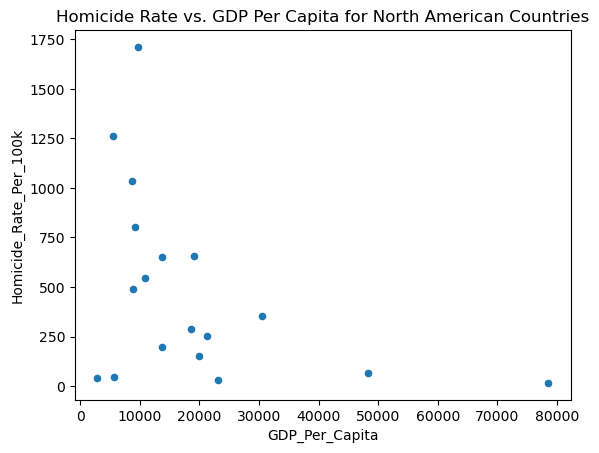

In [428]:
gdp_le_hom_2021[gdp_le_hom_2021['Continent']=='North America'].plot(kind='scatter', x='GDP_Per_Capita', y='Homicide_Rate_Per_100k')
plt.title('Homicide Rate vs. GDP Per Capita for North American Countries')